In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import homogeneity_score

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\iNeuron\iNeuron - Machine Learning\M L Codes\7 clustering\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:,3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
wcss= []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++')
    kmean.fit(X)
    wcss.append(kmean.inertia_)

Text(0, 0.5, 'WCSS')

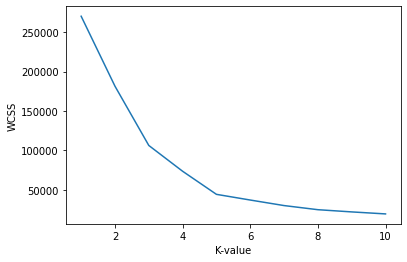

In [5]:
plt.plot(range(1,11), wcss)
plt.xlabel('K-value')
plt.ylabel('WCSS')

### To choose the best k value will look for elbow point, sometimes it'll be very difficult to observe so for that  we have Knee Locator it'll give the best k value.

In [6]:
knee = KneeLocator(range(1,11), wcss,curve='convex', direction='decreasing')
print(f'The Optimum k value is: {knee.knee}')

The Optimum k value is: 5


Text(0, 0.5, 'WCSS')

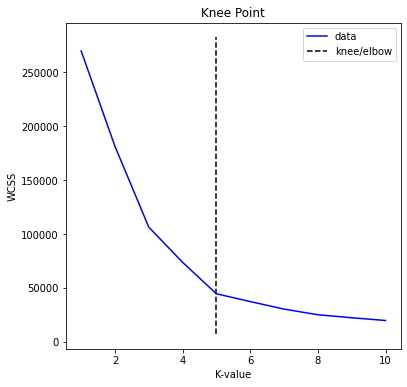

In [7]:
knee.plot_knee()
plt.xlabel('K-value')
plt.ylabel('WCSS')

In [8]:
k = KMeans(n_clusters=5)
y = k.fit_predict(X)
print(y)
X['cluster'] = y
X

[1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 3 4 0 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,1
1,15,81,2
2,16,6,1
3,16,77,2
4,17,40,1
...,...,...,...
195,120,79,4
196,126,28,3
197,126,74,4
198,137,18,3


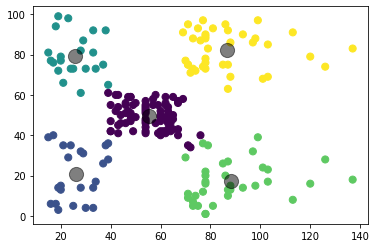

In [9]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y, s=50, cmap='viridis')

centers = k.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## To check the similarity in the cluster we can use hhomogeneity_score

In [10]:
homogeneity_score(k.labels_,y)

1.0

# Hierarchial clustering
- Agglomerative
- DBSCAN

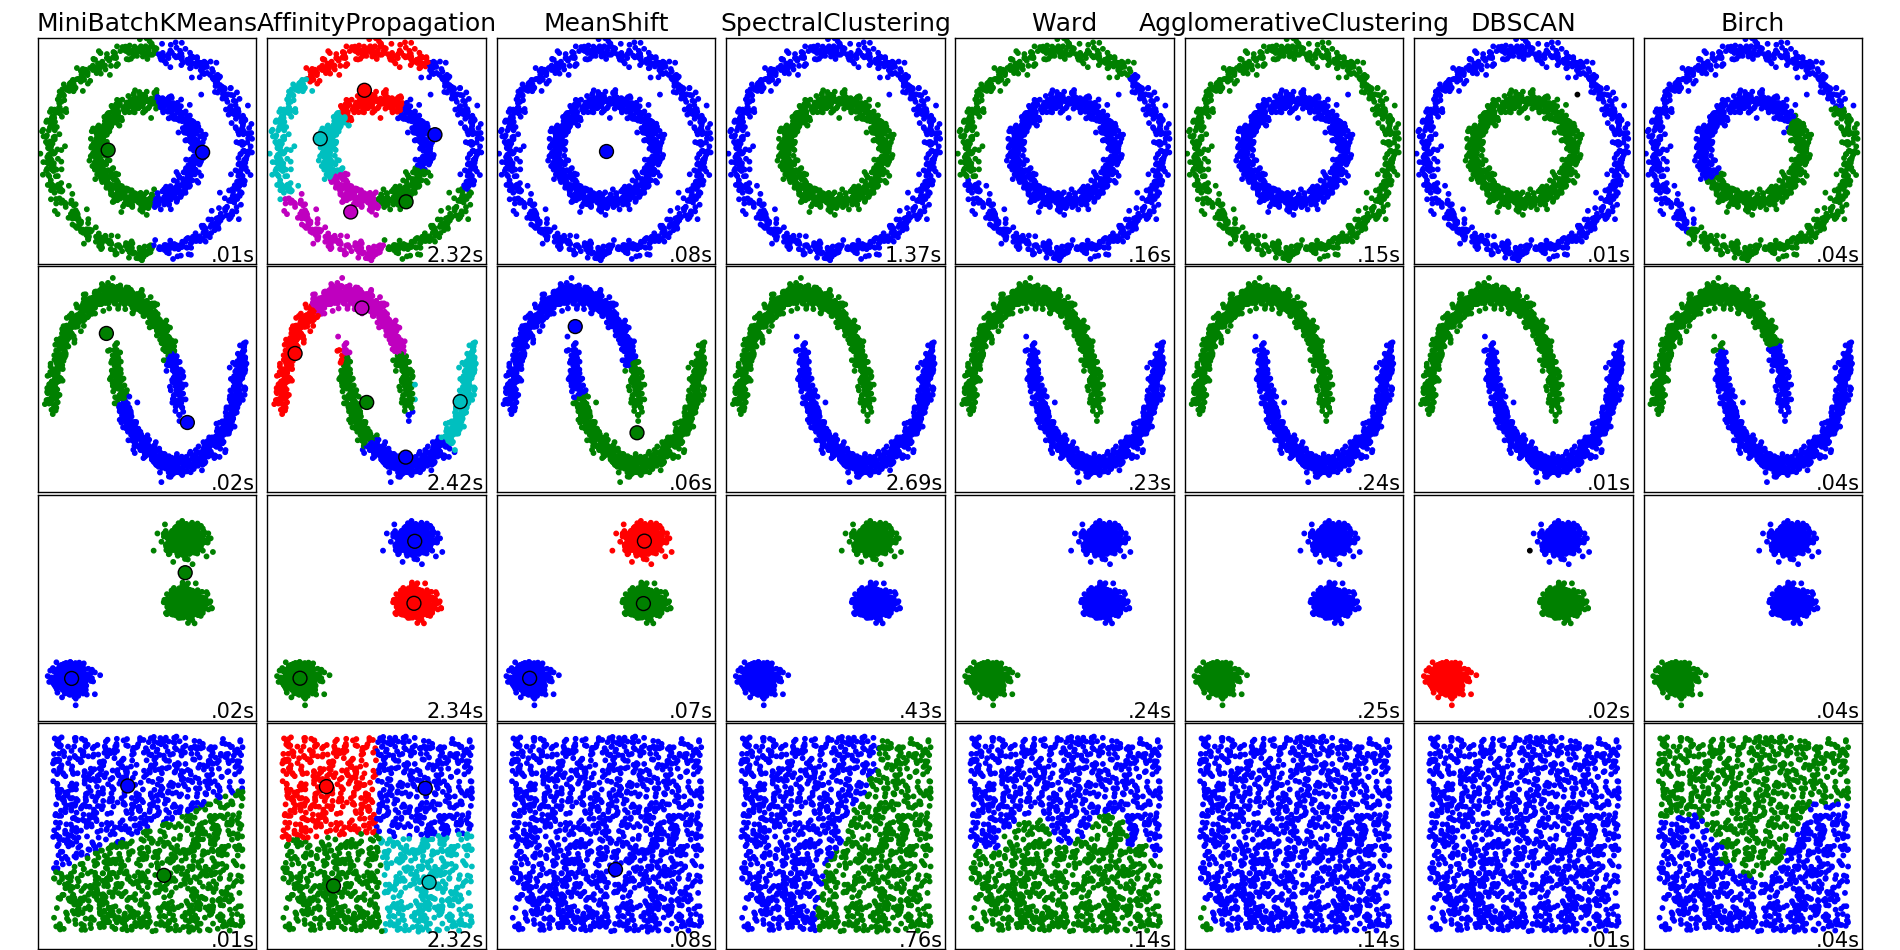

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import *
from scipy.spatial.distance import cdist

In [12]:
#calculates the distances between the data points
ds = cdist(X, X)

In [13]:
lm = linkage(ds, "single")
#displays first 3 distances
lm[:3]

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([[ 48.,  49.,   0.,   2.],
       [ 65.,  68.,   0.,   2.],
       [156., 158.,   0.,   2.]])

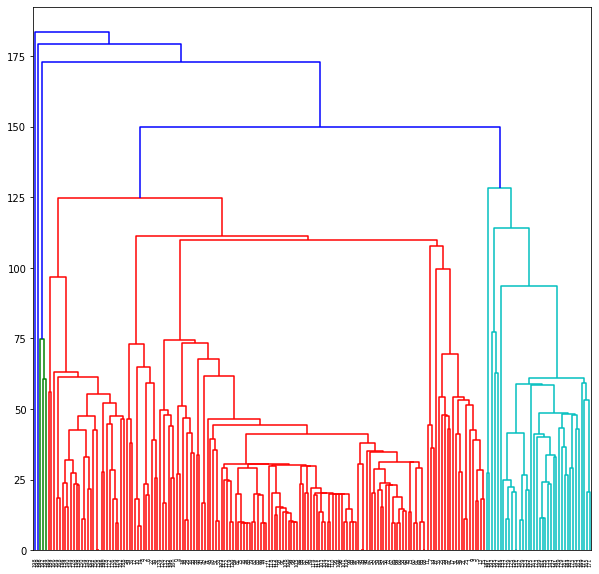

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
_=dendrogram(lm)

From the above Dendogram we can say 5 clusters if we choose linkage = single